In [35]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("paper")

In [15]:
pd.__version__

'1.1.3'

In [16]:
protein_csv = "../gtdb95-evolpaths.pathcompare.protein-input.csv.gz"
#dna_csv = "../gtdb95-evolpaths.pathcompare.dna-input.csv.gz"

In [17]:
proteinDF = pd.read_csv(protein_csv, sep=",")
proteinDF

,comparison_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,anchor_containment,anchor_hashes,query_hashes,num_common,alpha-ksize
0,GCA_004524385.1_x_GCA_004524535.1,path1,genus,protein,7,100,0.261496,0.613636,0.613636,5236,10264,3213,protein-7
1,GCA_004524385.1_x_GCA_004375715.1,path1,family,protein,7,100,0.026196,0.068182,0.068182,5236,8749,357,protein-7
2,GCA_004524385.1_x_GCA_004524545.1,path1,order,protein,7,100,0.007171,0.017189,0.017189,5236,7404,90,protein-7
3,GCA_004524385.1_x_GCA_005191425.1,path1,class,protein,7,100,0.007075,0.019672,0.019672,5236,9426,103,protein-7
4,GCA_004524385.1_x_GCA_001940645.1,path1,phylum,protein,7,100,0.003614,0.013369,0.013369,5236,14203,70,protein-7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177415,GCA_004376785.1_x_GCA_001303785.1,path2957,family,hp,35,100,0.029491,0.066934,0.066934,5229,6989,350,hp-35
177416,GCA_004376785.1_x_GCA_003645615.1,path2957,order,hp,35,100,0.005846,0.012813,0.012813,5229,6299,67,hp-35
177417,GCA_004376785.1_x_GCA_002347155.1,path2957,class,hp,35,100,0.001075,0.003060,0.003060,5229,9667,16,hp-35
177418,GCA_004376785.1_x_GCA_002774315.1,path2957,phylum,hp,35,100,0.001791,0.004747,0.002869,5229,3160,15,hp-35


In [25]:
# any zeroes?
print(proteinDF[proteinDF["jaccard"] == 0].lowest_common_rank.unique())
proteinDF[proteinDF["jaccard"] == 0]

['superkingdom' 'phylum' 'class' 'order' 'family']


,comparison_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,anchor_containment,anchor_hashes,query_hashes,num_common,alpha-ksize
17795,GCA_002254825.2_x_GCA_003661365.1,path9,superkingdom,protein,9,100,0.0,0.0,0.0,3029,5168,0,protein-9
17879,GCA_002719395.1_x_GCA_003661365.1,path23,superkingdom,protein,9,100,0.0,0.0,0.0,5199,5168,0,protein-9
17891,GCA_003602665.1_x_GCA_003661365.1,path25,superkingdom,protein,9,100,0.0,0.0,0.0,4924,5168,0,protein-9
17897,GCA_002723635.1_x_GCA_003661365.1,path26,superkingdom,protein,9,100,0.0,0.0,0.0,4202,5168,0,protein-9
17903,GCA_002718195.1_x_GCA_003661365.1,path27,superkingdom,protein,9,100,0.0,0.0,0.0,6093,5168,0,protein-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
171653,GCA_003452275.1_x_GCA_003864455.1,path1996,superkingdom,hp,35,100,0.0,0.0,0.0,3943,6072,0,hp-35
175329,GCA_004296495.1_x_GCA_002342165.1,path2609,class,hp,35,100,0.0,0.0,0.0,597,5356,0,hp-35
175330,GCA_004296495.1_x_GCF_004358185.1,path2609,phylum,hp,35,100,0.0,0.0,0.0,597,12350,0,hp-35
176369,GCA_002711285.1_x_GCA_003864455.1,path2782,superkingdom,hp,35,100,0.0,0.0,0.0,2253,6072,0,hp-35


In [26]:
print(proteinDF[proteinDF["max_containment"] == 0].lowest_common_rank.unique())
proteinDF[proteinDF["max_containment"] == 0]

['superkingdom' 'phylum' 'class' 'order' 'family']


,comparison_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,anchor_containment,anchor_hashes,query_hashes,num_common,alpha-ksize
17795,GCA_002254825.2_x_GCA_003661365.1,path9,superkingdom,protein,9,100,0.0,0.0,0.0,3029,5168,0,protein-9
17879,GCA_002719395.1_x_GCA_003661365.1,path23,superkingdom,protein,9,100,0.0,0.0,0.0,5199,5168,0,protein-9
17891,GCA_003602665.1_x_GCA_003661365.1,path25,superkingdom,protein,9,100,0.0,0.0,0.0,4924,5168,0,protein-9
17897,GCA_002723635.1_x_GCA_003661365.1,path26,superkingdom,protein,9,100,0.0,0.0,0.0,4202,5168,0,protein-9
17903,GCA_002718195.1_x_GCA_003661365.1,path27,superkingdom,protein,9,100,0.0,0.0,0.0,6093,5168,0,protein-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
171653,GCA_003452275.1_x_GCA_003864455.1,path1996,superkingdom,hp,35,100,0.0,0.0,0.0,3943,6072,0,hp-35
175329,GCA_004296495.1_x_GCA_002342165.1,path2609,class,hp,35,100,0.0,0.0,0.0,597,5356,0,hp-35
175330,GCA_004296495.1_x_GCF_004358185.1,path2609,phylum,hp,35,100,0.0,0.0,0.0,597,12350,0,hp-35
176369,GCA_002711285.1_x_GCA_003864455.1,path2782,superkingdom,hp,35,100,0.0,0.0,0.0,2253,6072,0,hp-35


In [27]:
print(proteinDF[proteinDF["anchor_containment"] == 0].lowest_common_rank.unique())
proteinDF[proteinDF["anchor_containment"] == 0]

['superkingdom' 'phylum' 'class' 'order' 'family']


,comparison_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,anchor_containment,anchor_hashes,query_hashes,num_common,alpha-ksize
17795,GCA_002254825.2_x_GCA_003661365.1,path9,superkingdom,protein,9,100,0.0,0.0,0.0,3029,5168,0,protein-9
17879,GCA_002719395.1_x_GCA_003661365.1,path23,superkingdom,protein,9,100,0.0,0.0,0.0,5199,5168,0,protein-9
17891,GCA_003602665.1_x_GCA_003661365.1,path25,superkingdom,protein,9,100,0.0,0.0,0.0,4924,5168,0,protein-9
17897,GCA_002723635.1_x_GCA_003661365.1,path26,superkingdom,protein,9,100,0.0,0.0,0.0,4202,5168,0,protein-9
17903,GCA_002718195.1_x_GCA_003661365.1,path27,superkingdom,protein,9,100,0.0,0.0,0.0,6093,5168,0,protein-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
171653,GCA_003452275.1_x_GCA_003864455.1,path1996,superkingdom,hp,35,100,0.0,0.0,0.0,3943,6072,0,hp-35
175329,GCA_004296495.1_x_GCA_002342165.1,path2609,class,hp,35,100,0.0,0.0,0.0,597,5356,0,hp-35
175330,GCA_004296495.1_x_GCF_004358185.1,path2609,phylum,hp,35,100,0.0,0.0,0.0,597,12350,0,hp-35
176369,GCA_002711285.1_x_GCA_003864455.1,path2782,superkingdom,hp,35,100,0.0,0.0,0.0,2253,6072,0,hp-35


In [28]:
protDF = proteinDF[proteinDF["jaccard"] != 0]

In [40]:
def similarity_to_evoldist(similarity, ksize, b1=1.0, b2=1.0, return_ANI=False):
    # orig used with jaccard; trying with jaccard, max containment, anchor containment
    # proportion of observed differences
    if similarity ==0:
        return 1.0 # what should this be? (jaccard of 1.0 returns 0)
    p = 1 - np.power(2*similarity/(similarity + 1),(1/float(ksize)))
    # corrected evolutionary distance
    d = -(b1*np.log((1-p)/b2))
    if return_ANI:
        return 1-d
    return d

def calculate_ANI_AAI(row):
    name = "ANI"
    if row["alphabet"] in ["protein", "dayhoff", "hp"]:
        name = "AAI"
    j_name = f"jaccard_{name}"
    mc_name = f"mc_{name}"
    ac_name = f"ac_{name}"
    row[j_name] = similarity_to_evoldist(row["jaccard"], row["ksize"], return_ANI=True)
    row[mc_name] = similarity_to_evoldist(row["max_containment"], row["ksize"], return_ANI=True)
    row[ac_name] = similarity_to_evoldist(row["anchor_containment"], row["ksize"], return_ANI=True)
    return row

In [41]:
protDF = proteinDF

In [42]:
testDF = protDF.apply(calculate_ANI_AAI, axis=1)

In [43]:
testDF

,comparison_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,anchor_containment,anchor_hashes,query_hashes,num_common,alpha-ksize,jaccard_AAI,mc_AAI,ac_AAI
0,GCA_004524385.1_x_GCA_004524535.1,path1,genus,protein,7,100,0.261496,0.613636,0.613636,5236,10264,3213,protein-7,0.874216,0.960901,0.960901
1,GCA_004524385.1_x_GCA_004375715.1,path1,family,protein,7,100,0.026196,0.068182,0.068182,5236,8749,357,protein-7,0.575020,0.705945,0.705945
2,GCA_004524385.1_x_GCA_004524545.1,path1,order,protein,7,100,0.007171,0.017189,0.017189,5236,7404,90,protein-7,0.392619,0.516086,0.516086
3,GCA_004524385.1_x_GCA_005191425.1,path1,class,protein,7,100,0.007075,0.019672,0.019672,5236,9426,103,protein-7,0.390695,0.535012,0.535012
4,GCA_004524385.1_x_GCA_001940645.1,path1,phylum,protein,7,100,0.003614,0.013369,0.013369,5236,14203,70,protein-7,0.295229,0.480721,0.480721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177415,GCA_004376785.1_x_GCA_001303785.1,path2957,family,hp,35,100,0.029491,0.066934,0.066934,5229,6989,350,hp-35,0.918298,0.940695,0.940695
177416,GCA_004376785.1_x_GCA_003645615.1,path2957,order,hp,35,100,0.005846,0.012813,0.012813,5229,6299,67,hp-35,0.872723,0.894947,0.894947
177417,GCA_004376785.1_x_GCA_002347155.1,path2957,class,hp,35,100,0.001075,0.003060,0.003060,5229,9667,16,hp-35,0.824483,0.854306,0.854306
177418,GCA_004376785.1_x_GCA_002774315.1,path2957,phylum,hp,35,100,0.001791,0.004747,0.002869,5229,3160,15,hp-35,0.839043,0.866804,0.852467


In [54]:
#dayhoff_rankinfo = dayhoff.groupby("rank", "alphabet")['num_lca_kmers'].agg('sum')
rankorder = ["genus", "family", "order", "class", "phylum", "superkingdom"]
nucl_order = ["nucleotide-21", "nucleotide-31", "nucleotide-51"]
protein_order = ["protein-7", "protein-9", "protein-10", "protein-11"]
dayhoff_order = ["dayhoff-15", "dayhoff-17", "dayhoff-19"]
hp_order = ["hp-30", "hp-33", "hp-35"]

all_protein_order = prot_order + dayhoff_order + hp_order
alphak_order = nucl_order + prot_order + dayhoff_order + hp_order

alphabet_colors = {"nucleotide":"#b2182b", "protein": "#2166ac", "dayhoff": "#4393c3", "hp": "#92c5de"}
alphabet_order = ["nucleotide", "protein", "dayhoff", "hp"]
protnucl_colors = {"nucleotide":"#b2182b", "protein": "#2166ac"}
protnucl_order = ["nucleotide", "protein"]

pnlong_colors = {"nucleotide-21":"#b2182b","nucleotide-31":"#d6604d","nucleotide-51":"#f4a582", "protein-10": "#2166ac"}
pnlong_colors2 = {"nucleotide-21":"#b2182b","nucleotide-31":"#d6604d","nucleotide-51":"#f4a582", "protein-7": "#2166ac"}

alphak_colors = {}
nucl_colors =  {"nucleotide-21":"#b2182b","nucleotide-31":"#d6604d","nucleotide-51":"#f4a582"}
protein_colors = {"protein-7": "#a1d99b", "protein-9": "#74c476", "protein-10": "#31a354", "protein-11": "#006d2c"} 
dayhoff_colors = {"dayhoff-15": "#9e9ac8", "dayhoff-17": "#756bb1", "dayhoff-19": "#54278f"}
hp_colors = {"hp-30": "#6baed6", "hp-33": "#3182bd", "hp-35": "#08519c"}

all_protein_colors = protein_colors
all_protein_colors.update(dayhoff_colors)
all_protein_colors.update(hp_colors)

alphak_colors = all_protein_colors
alphak_colors.update(nucl_colors)
#alphak_colors.update(protein_colors)
#alphak_colors.update(dayhoff_colors)
#alphak_colors.update(hp_colors)

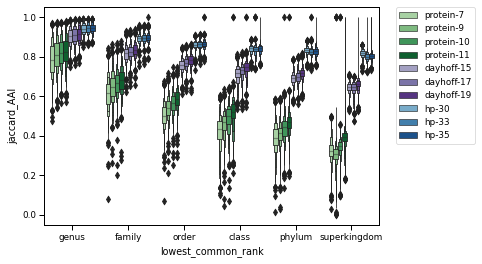

In [51]:
g=sns.boxenplot(data=testDF, x="lowest_common_rank", y="jaccard_AAI", hue="alpha-ksize", palette=all_protein_colors, order=rankorder, hue_order=all_protein_order ) #palette="GnBu_d"
#g.set(yscale="log")
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

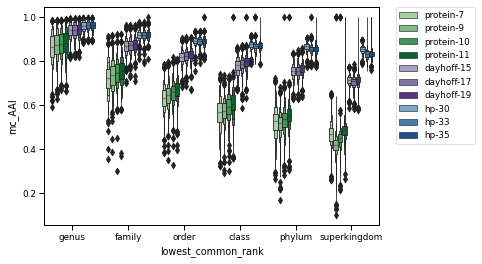

In [52]:
g=sns.boxenplot(data=testDF, x="lowest_common_rank", y="mc_AAI", hue="alpha-ksize", palette=all_protein_colors, order=rankorder, hue_order=all_protein_order ) #palette="GnBu_d"
#g.set(yscale="log")
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

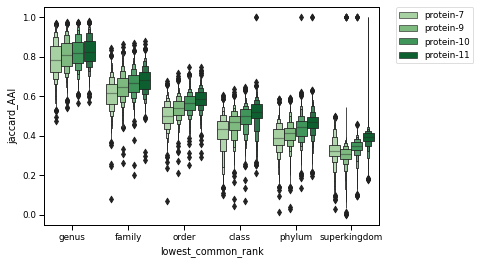

In [55]:
g=sns.boxenplot(data=testDF, x="lowest_common_rank", y="jaccard_AAI", hue="alpha-ksize", palette=protein_colors, order=rankorder, hue_order=protein_order ) #palette="GnBu_d"
#g.set(yscale="log")
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

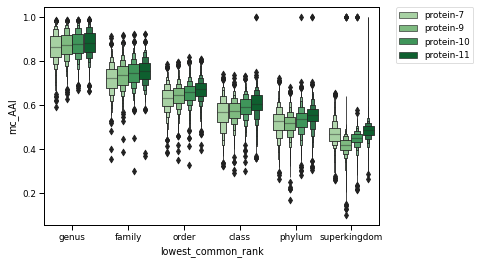

In [56]:
g=sns.boxenplot(data=testDF, x="lowest_common_rank", y="mc_AAI", hue="alpha-ksize", palette=protein_colors, order=rankorder, hue_order=protein_order ) #palette="GnBu_d"
#g.set(yscale="log")
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

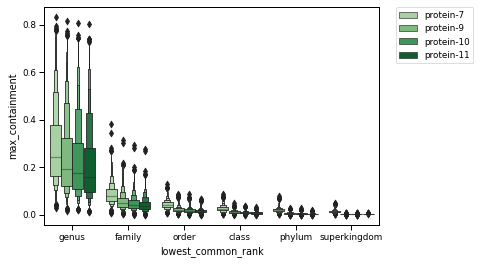

In [57]:
g=sns.boxenplot(data=testDF, x="lowest_common_rank", y="max_containment", hue="alpha-ksize", palette=protein_colors, order=rankorder, hue_order=protein_order ) #palette="GnBu_d"
#g.set(yscale="log")
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
# calculate pdist, evoldist, ANI / AAI
#jaccardMelt_noz["pdist"] =  1- ((2*jaccardMelt_noz["jaccard"]/(jaccardMelt_noz["jaccard"]+1))** (1/jaccardMelt_noz["ksize"]))
#jaccardMelt_noz["evol-1dist"] = -np.log(1 - jaccardMelt_noz["pdist"]) #default log base is e